### Aidi 1002 Lab 8
### Authors: Ahmad Sayeb, Harshal Bhasgauri

In [4]:
from sklearn.datasets import load_iris
from sklearn import decomposition
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# Loading data
def load_data():
    '''
    Load and Normalize data
    '''
    iris = load_iris()
    df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
    # split normalize and concat
    X = df.loc[:, df.columns != 'target']
    y = df[['target']]
    X_normalized=(X - X.mean()) / X.std()
    df_normalized = pd.concat([X_normalized, y], axis=1)
    return df_normalized


def pca_reduction(df: 'dataframe', n: int) -> 'dataframe':
    '''
    peform pca reduction on dataframe and plots PCA against first two columns
    passed dataframe must be normalized
    '''
    X = df.loc[:, df.columns != 'target']
    pca = decomposition.PCA(n_components=n)
    principal_comp = pca.fit_transform(X)
    principal_df = pd.DataFrame(data=principal_comp, columns=['principal_comp_1', 'principal_comp_2'])
    final_df = pd.concat([principal_df, df[['target']]], axis=1)
    
    #print variance
    print('Variance of each component:', pca.explained_variance_ratio_)
    print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
    #plot the PCA and the old data
    X_new = pca.inverse_transform(principal_comp)
    plt.scatter(X['sepal length (cm)'].values, X['sepal width (cm)'].values, label='original columns', alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1],label='pca components', alpha=0.8)
    plt.axis('equal')
    plt.legend(loc="upper left")
    plt.xlabel('PCA Component 1 & Sepal Length')
    plt.ylabel('PCA Component 2 & Sepal Width')
    plt.title('PCA Components Compare to Columns')
    return final_df


In [6]:
# loading data
df = load_data()
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,0.0
1,-1.139200,-0.131539,-1.335752,-1.311052,0.0
2,-1.380727,0.327318,-1.392399,-1.311052,0.0
3,-1.501490,0.097889,-1.279104,-1.311052,0.0
4,-1.018437,1.245030,-1.335752,-1.311052,0.0
5,-0.535384,1.933315,-1.165809,-1.048667,0.0
6,-1.501490,0.786174,-1.335752,-1.179859,0.0
7,-1.018437,0.786174,-1.279104,-1.311052,0.0
8,-1.743017,-0.360967,-1.335752,-1.311052,0.0
9,-1.139200,0.097889,-1.279104,-1.442245,0.0


Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


,principal_comp_1,principal_comp_2,target
0,-2.257141,0.478424,0.0
1,-2.074013,-0.671883,0.0
2,-2.356335,-0.340766,0.0
3,-2.291707,-0.595400,0.0
4,-2.381863,0.644676,0.0
...,...,...,...
145,1.864258,0.385674,2.0
146,1.559356,-0.893693,2.0
147,1.516091,0.268171,2.0
148,1.368204,1.007878,2.0


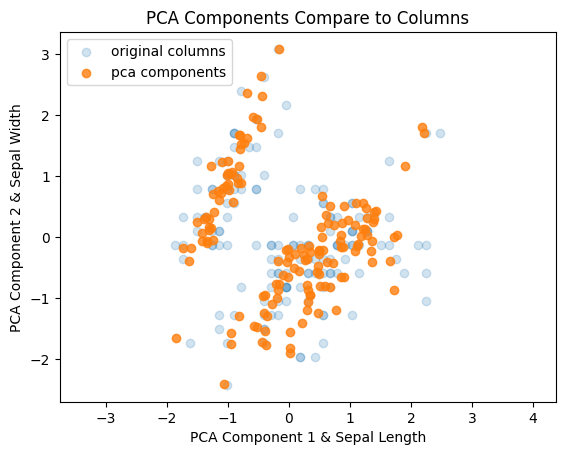

In [27]:
# applying pca reduction and printing the variances
pca_reduction(df,2)

### Comparison with LDA and Conclusion

PCA is an unsupervised method that doesn't care about the labels of the classes while LDA is a supervised that tries to achieve maximum variance within the classes. As its seen from the class notes and the lab PCA tires to maximize the variance without taking into consideration the lables of the classes. The variance score of 0.72 and 0.22 shows that both components have significant contribution (although first one is higher) to the overall variance while in the case of LDA its only the first component that contributes significantly higher than the second component